In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

In [2]:
train = pd.read_csv("final_unbalanced.csv")

In [3]:
train.shape

(1211912, 72)

In [4]:

df = train
df

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,690035,172.31.64.38-95.215.62.54-3389-52201-6,95.215.62.54,52201,172.31.64.38,3389,6,20/02/2018 12:26:05,4544883,12,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,2702781,172.31.0.2-172.31.64.96-53-57165-17,172.31.64.96,57165,172.31.0.2,53,17,20/02/2018 12:49:58,353,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,6540559,172.31.66.103-23.36.34.146-51340-443-6,172.31.66.103,51340,23.36.34.146,443,6,20/02/2018 10:31:00,5206057,6,...,20,136669.0,0.0,136669.0,136669.0,5069365.0,0.0,5069365.0,5069365.0,Benign
3,138035,151.101.20.129-192.168.10.51-80-60389-6,192.168.10.51,60389,151.101.20.129,80,6,03/07/2017 08:16:07 PM,5688954,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,7653122,172.31.65.87-185.129.148.159-3389-20750-6,172.31.65.87,3389,185.129.148.159,20750,6,20/02/2018 05:17:04,82717004,2,...,20,0.0,0.0,0.0,0.0,82717010.0,0.0,82717010.0,82717010.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211907,1170714,172.31.0.2-172.31.66.100-53-65526-17,172.31.66.100,65526,172.31.0.2,53,17,20/02/2018 10:43:12,1771,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1211908,7871939,139.60.161.214-172.31.67.8-31903-3389-6,172.31.67.8,3389,139.60.161.214,31903,6,20/02/2018 05:16:05,88514671,2,...,20,0.0,0.0,0.0,0.0,88514670.0,0.0,88514670.0,88514670.0,Benign
1211909,5218102,172.31.68.10-117.4.80.56-3389-11737-6,117.4.80.56,11737,172.31.68.10,3389,6,20/02/2018 08:56:56,2531695,8,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1211910,4160149,172.31.0.2-172.31.66.75-53-64765-17,172.31.66.75,64765,172.31.0.2,53,17,20/02/2018 03:20:55,131277,2,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
from sklearn import preprocessing
for f in train.columns:
    if train[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f] = lbl.transform(list(train[f].values))

train.fillna((-999), inplace=True)
train=np.array(train)
train = train.astype(float)

In [6]:
import numpy as np
from sklearn import preprocessing

# Kiểm tra giá trị vô cùng và NaN trong mảng X
is_inf = np.isinf(train)
is_nan = np.isnan(train)

# Xử lý giá trị vô cùng và NaN bằng replace_value
replace_value = 9999  # Giá trị thay thế
train[is_inf] = replace_value
train[is_nan] = replace_value

# Kiểm tra kiểu dữ liệu và chuyển đổi kiểu dữ liệu nếu cần thiết
if train.dtype != np.float64:
    train = train.astype(np.float64)

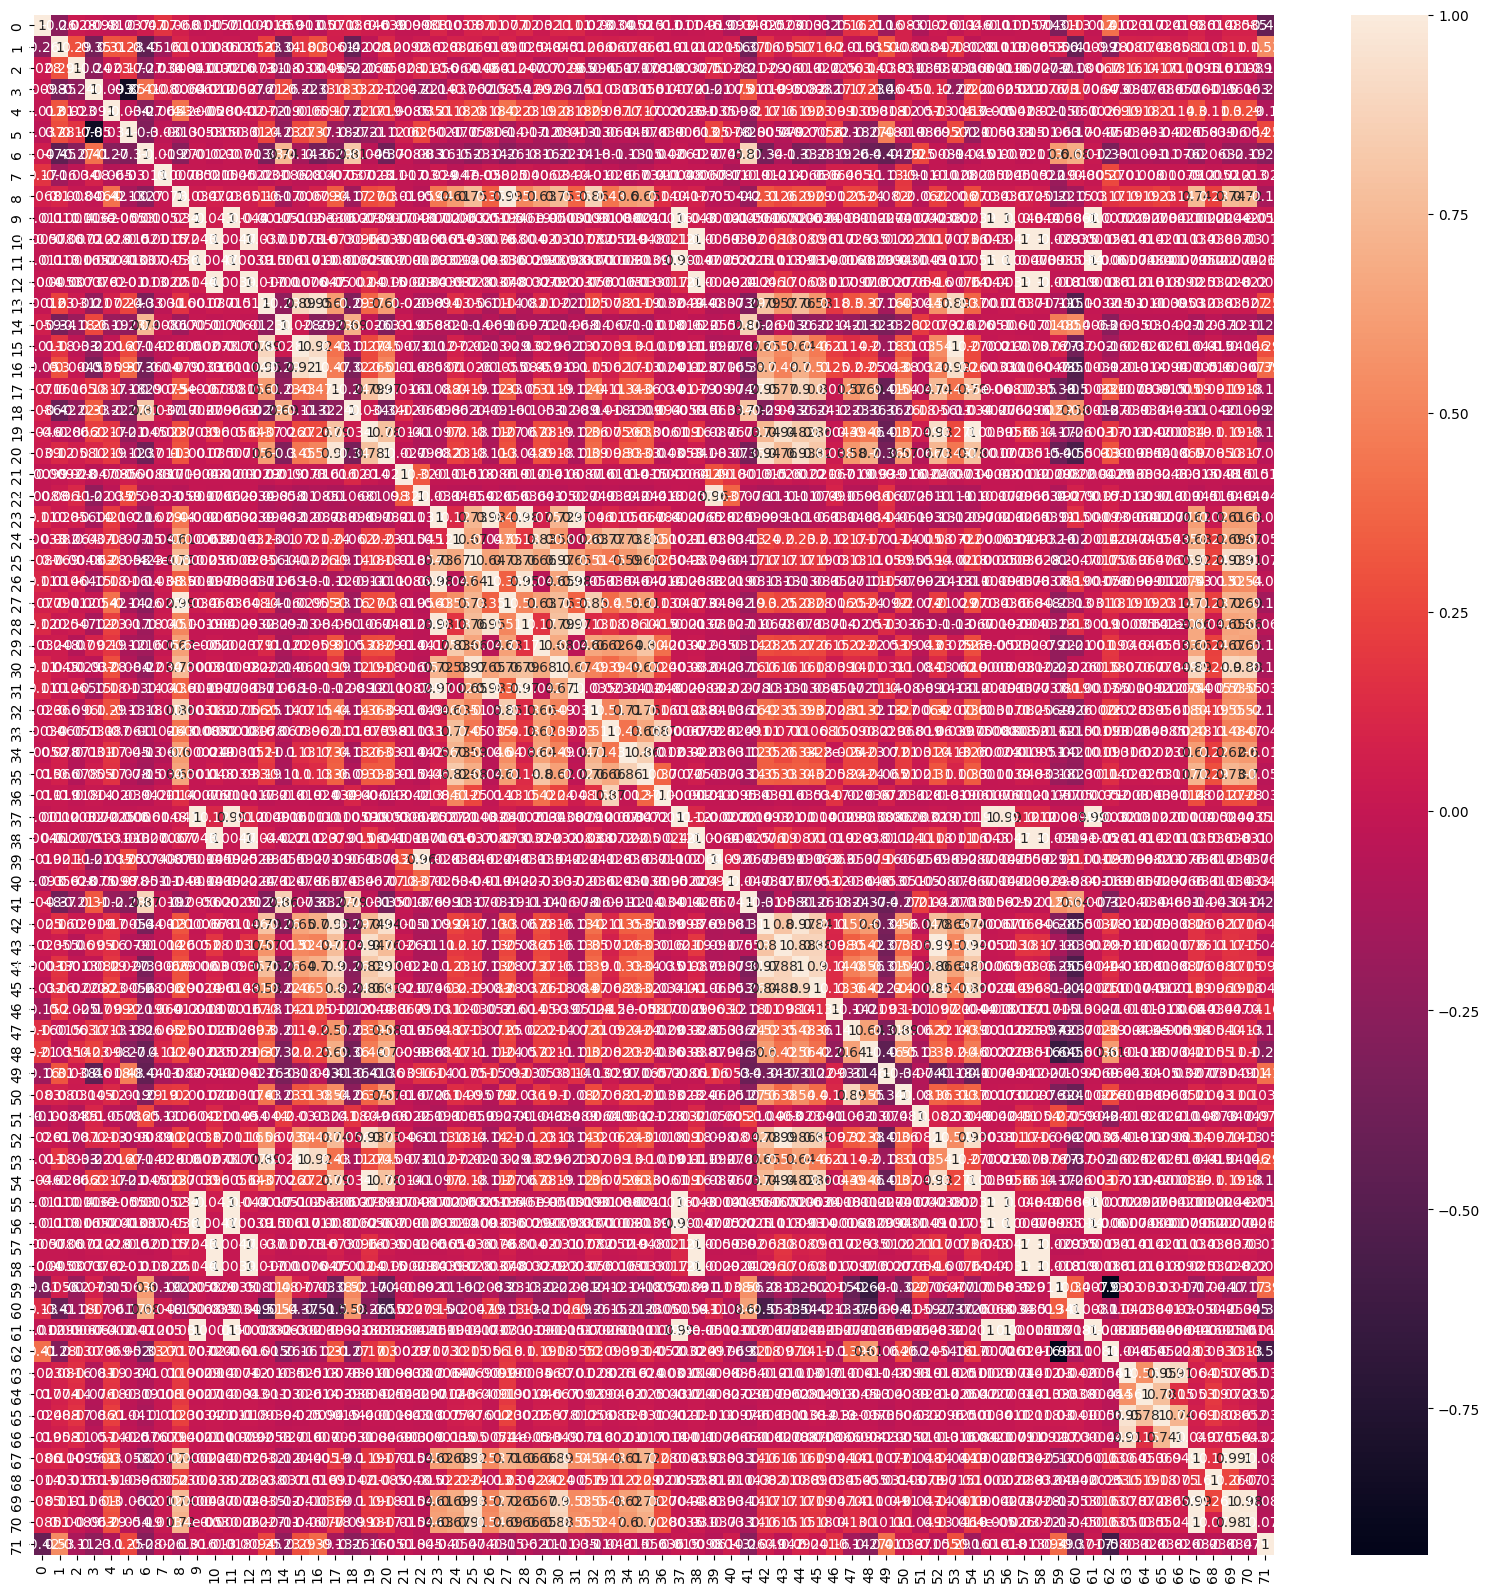

In [7]:
import seaborn as sns

# Xem mối quan hệ giữa các biến
# Chuyển đổi mảng NumPy thành DataFrame
train_df = pd.DataFrame(train)
correlation_matrix = train_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [8]:
# Kiểm tra kiểu dữ liệu của 'train'
print(type(train))  # Kiểm tra xem 'train' là kiểu dữ liệu gì

# Nếu 'train' là mảng numpy
if isinstance(train, np.ndarray):
    print(train.shape)  # Xem kích thước của mảng numpy
    # Truy cập các phần tử thông qua cú pháp chỉ mục
    Y = train[:, -1]  # Lấy cột cuối cùng làm nhãn, truy cập bằng chỉ mục -1
    X = train[:, :-1]  # Lấy các cột còn lại ngoài cột cuối cùng

<class 'numpy.ndarray'>
(1211912, 72)


In [9]:
print(train.shape)
print(X.shape)
print(Y.shape)

(1211912, 72)
(1211912, 71)
(1211912,)


In [10]:
# split data into train and test sets
seed = 42 
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(848338, 71)
(848338,)
(363574, 71)
(363574,)


In [12]:
# Định nghĩa lưới tham số để tìm kiếm
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

# Tạo mô hình BernoulliNB
model = BernoulliNB()

# Tạo đối tượng GridSearchCV kết hợp tìm kiếm và đào tạo, với refit=True
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, refit=True)

# Tiến hành tìm kiếm siêu tham số và đào tạo mô hình trên tập huấn luyện
grid_search.fit(X_train, y_train)

# Dự đoán kết quả trên tập kiểm tra bằng mô hình đã đào tạo
y_pred = grid_search.predict(X_test)

# In ra thông số tốt nhất và kết quả đạt được
print("Các tham số tốt nhất:", grid_search.best_params_)
print("Điểm số tốt nhất:", grid_search.best_score_)


Các tham số tốt nhất: {'alpha': 0.1, 'binarize': 1.0, 'fit_prior': False}
Điểm số tốt nhất: 0.8274980034401258


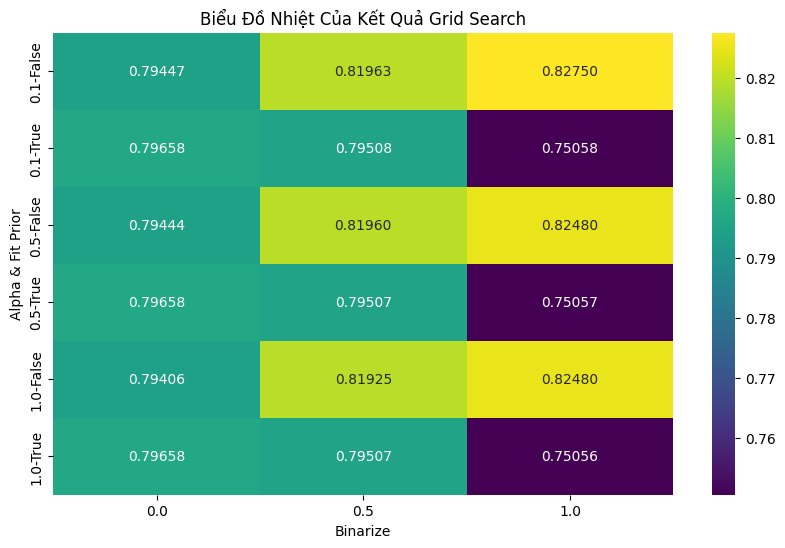

In [13]:
import seaborn as sns
# Chuyển kết quả tìm kiếm lưới thành DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Chọn chỉ các cột quan trọng
important_columns = ['mean_test_score', 'param_alpha', 'param_binarize', 'param_fit_prior']

# Lọc kết quả với các cột đã chọn
filtered_results = results[important_columns]

# Tạo pivot table để dễ dàng vẽ biểu đồ
pivot_table = filtered_results.pivot_table(
    values='mean_test_score',
    index=['param_alpha', 'param_fit_prior'],
    columns='param_binarize'
)

# Trực quan hóa dữ liệu dưới dạng biểu đồ nhiệt
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".5f")
plt.title('Biểu Đồ Nhiệt Của Kết Quả Grid Search')
plt.xlabel('Binarize')
plt.ylabel('Alpha & Fit Prior')
plt.show()

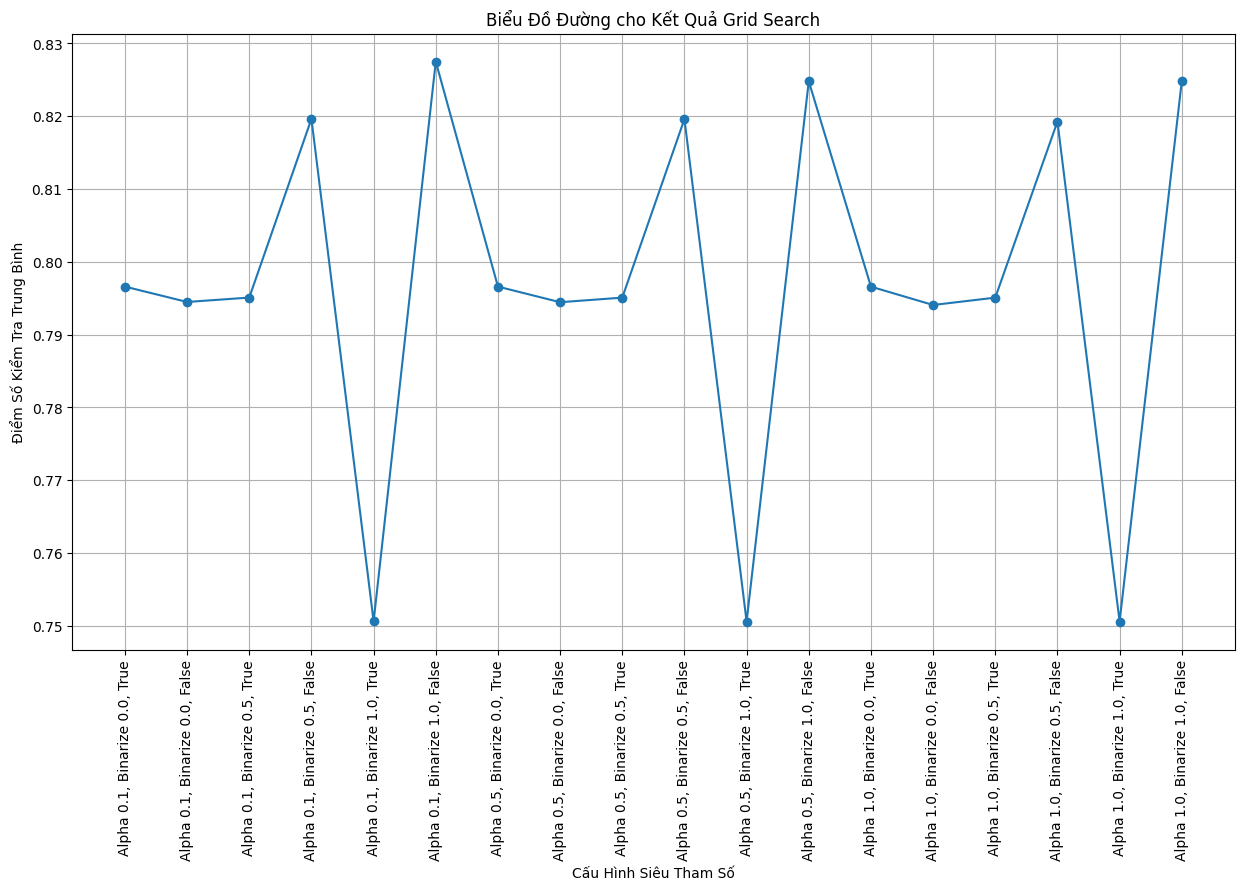

In [14]:
# Chuyển đổi kết quả tìm kiếm lưới thành DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Thêm cột nhận dạng cho mỗi cấu hình siêu tham số
results['case'] = results.apply(lambda row: f"Alpha {row['param_alpha']}, Binarize {row['param_binarize']}, {row['param_fit_prior']}", axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
plt.plot(results['case'], results['mean_test_score'], marker='o')

# Đặt các tick trên trục x
plt.xticks(rotation=90)  # Xoay các tick để dễ đọc
plt.title('Biểu Đồ Đường cho Kết Quả Grid Search')
plt.xlabel('Cấu Hình Siêu Tham Số')
plt.ylabel('Điểm Số Kiểm Tra Trung Bình')
plt.grid(True)
plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr) 
rs=recall_score(y_test,y_pred) 
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.8267092806416301
f1-acore: 0.6609625898661157
confusion matrix:
 [[239156  58485]
 [  4519  61414]]
Precision: 0.5122144471596928
Recall_score: 0.9314607252817254
Misclassified : 63004


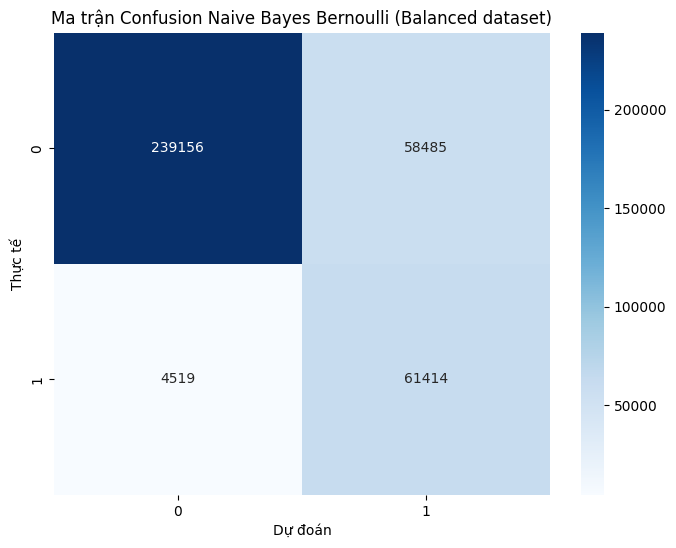

In [16]:
# Vẽ ma trận confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.title('Ma trận Confusion Naive Bayes Bernoulli (Balanced dataset)')
plt.show()


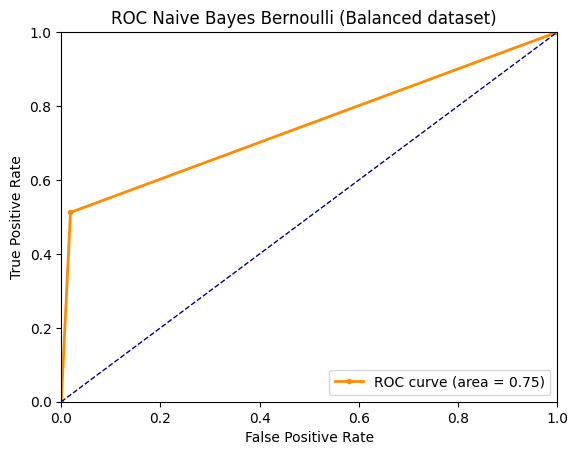

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc, marker='.')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes Bernoulli (Balanced dataset)  ')
plt.legend(loc="lower right")
plt.show()


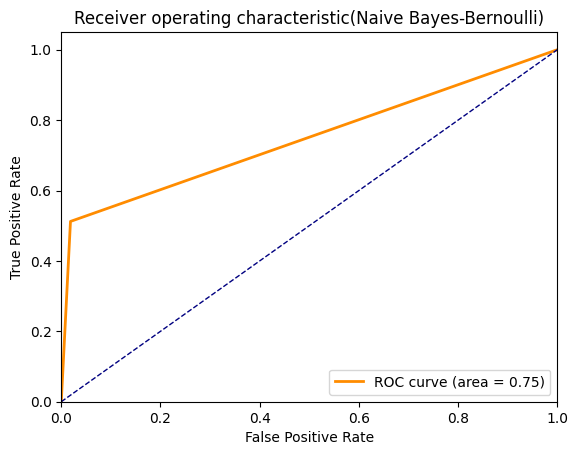

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Naive Bayes-Bernoulli)')
plt.legend(loc="lower right")
plt.show()


In [19]:
%%time
#from sklearn.neighbors import KNeighborsClassifier
model=BernoulliNB(binarize=0.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


CPU times: total: 328 ms
Wall time: 1.26 s


In [20]:
%%time
#from sklearn.neighbors import KNeighborsClassifier
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)


CPU times: total: 38.8 s
Wall time: 1min 29s
